<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/Object_Detection_on_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1yt3NfCfp7hnXIFfSq1kk8LYKfX_X6Qxq)

In [0]:
!nvidia-smi

Sun May 17 13:48:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install mxnet-cu101 
!pip install autogluon

In [0]:
!pip install -U ipykernel

In [0]:
import autogluon as ag
from autogluon import ObjectDetection as task

https://timebutt.github.io/

In [0]:
root = '/tmp'
filename_zip = ag.download('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nfpa.zip',
                        path=root)
filename = ag.unzip(filename_zip, root=root)

In [0]:
!ls /tmp/nfpa

Annotations  ImageSets	JPEGImages


In [0]:
import os
data_root = os.path.join(root, filename)
dataset_train = task.Dataset(data_root, classes=('nfpa',))

>>> create dataset(VOC format) 


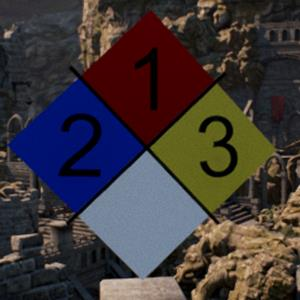

In [0]:
Image(os.path.join(data_root,"JPEGImages/pos-101.jpg"))

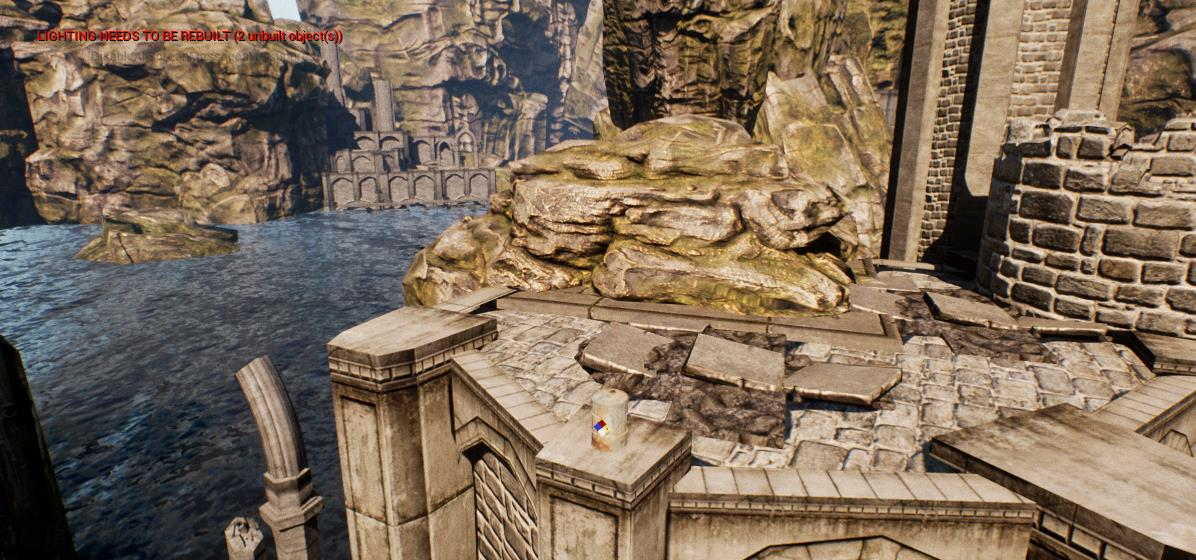

In [0]:
from IPython.display import Image
Image(os.path.join(data_root,"JPEGImages/pos-201.jpg"))


Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2
Time out (secs) is 20


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/310/1' processes=1 threads=2, memory=13.65 GB>, Resource: NodeResourceManager(2 CPUs, 1 GPUs))
})



Model file not found. Downloading.


88993KB [00:02, 43827.82KB/s]                           
{'meta_arch': 'yolo3', 'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f7f5ee9a2b0>, 'net': 'mobilenet1.0', 'lr': 0.0005, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.8, 'epochs': 25, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'transfer': 'coco', 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'warmup_iters': 1000, 'warmup_factor': 0.3333333333333333, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'reuse_pred_weights': True, 'task_id': 0

{'meta_arch': 'yolo3', 'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f7f5f6a07b8>, 'net': 'mobilenet1.0', 'lr': 0.0001, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.8, 'epochs': 25, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'transfer': 'coco', 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'warmup_iters': 1000, 'warmup_factor': 0.3333333333333333, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'reuse_pred_weights': True, 'task_id': 1}
[Epoch 0] Training cost: 56.244, ObjLoss=318.172,BoxCen

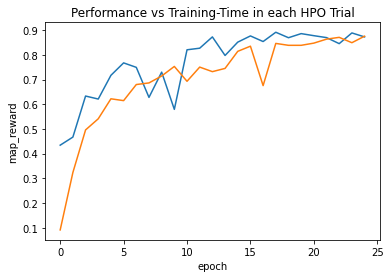

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> finish model fitting
The best config: {'lr.choice': 1, 'net.choice': 0}


In [0]:
time_limits = 20
epochs = 25
detector = task.fit(dataset_train,
                    num_trials=2,
                    epochs=epochs,
                    lr=ag.Categorical(5e-4, 1e-4),
                    ngpus_per_trial=1,
                    time_limits=time_limits)

In [0]:
dataset_test = task.Dataset(data_root, index_file_name='test', classes=('nfpa',))

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

>>> create dataset(VOC format) 


mAP on test dataset: 0.8111888111888113


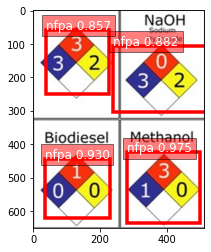

In [0]:
image = 'pos-230.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

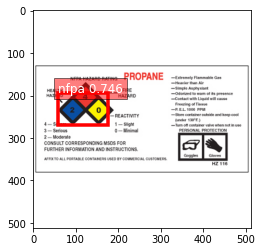

In [0]:
image = 'pos-23.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

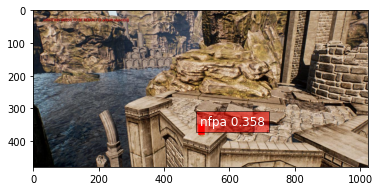

In [0]:
image = 'pos-201.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

In [0]:
savefile = 'model.pkl'
detector.save(savefile)

from autogluon import Detector
new_detector = Detector.load(savefile)

In [0]:
!ls 

checkpoint	   model.pkl	yolo3_mobilenet1.0_custom_train.log
dask-worker-space  sample_data
